<a href="https://colab.research.google.com/github/PiyushGithub24/MACHINE_LEARNING_BY_PIYUSH_KUMAR/blob/main/Binning(Decretization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the dependencies :--

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [ ]:
df=pd.read_csv("train.csv",usecols=["Survived","Age","Fare"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.shape

(891, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(714, 3)

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
X=df.drop("Survived",axis=1)
Y=df["Survived"]

In [ ]:
X

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
885,39.0,29.1250
886,27.0,13.0000
887,19.0,30.0000
889,26.0,30.0000


In [ ]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
X_train

,Age,Fare
3,35.0,53.1000
541,9.0,31.2750
679,36.0,512.3292
14,14.0,7.8542
238,19.0,10.5000
...,...,...
676,24.5,8.0500
734,23.0,13.0000
624,21.0,16.1000
666,25.0,13.0000


#Lets apply Decision Tree without Binning(Decretization) :--

In [ ]:
clf=DecisionTreeClassifier()
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
print("Accuracy score of DT : ",accuracy_score(Y_test,y_pred))

Accuracy score of DT :  0.6433566433566433


In [ ]:
clf=DecisionTreeClassifier()
scores=cross_val_score(clf,X,Y,cv=10,scoring="accuracy")
print("Cross validation score  : ",scores  )
print("Cross validation score mean : ",scores.mean())

Cross validation score  :  [0.59722222 0.61111111 0.625      0.65277778 0.56338028 0.71830986
 0.74647887 0.61971831 0.56338028 0.61971831]
Cross validation score mean :  0.6317097026604068


#Lets apply Decision Tree with Binning(Decretization) :--

##strategy="uniform"

In [ ]:
kbin_age=KBinsDiscretizer(n_bins=10,encode="ordinal",strategy="uniform")
kbin_fare=KBinsDiscretizer(n_bins=10,encode="ordinal",strategy="uniform")

In [ ]:
trf=ColumnTransformer([
    ("First",kbin_age,[0]),
    ("Second",kbin_fare,[1])
    ])

In [ ]:
x_train_trf=trf.fit_transform(X_train)
x_test_trf=trf.transform(X_test)

In [ ]:
trf.named_transformers_

{'First': KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform'),
 'Second': KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')}

In [ ]:
trf.named_transformers_['First']

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')

In [ ]:
trf.named_transformers_['First'].n_bins_

array([10])

In [ ]:
trf.named_transformers_['First'].bin_edges_

array([array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
              64.084, 72.042, 80.   ])                                       ],
      dtype=object)

In [ ]:
trf.named_transformers_['Second'].bin_edges_

array([array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
              307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ])          ],
      dtype=object)

In [ ]:
output=pd.DataFrame({
    "Age":X_train["Age"],
    "Age_trf_Bin":x_train_trf[:,0],
    "Fare":X_train["Fare"],
    "Fare_trf_Bin":x_train_trf[:,1]
})

In [ ]:
output.head()

,Age,Age_trf_Bin,Fare,Fare_trf_Bin
3,35.0,4.0,53.1000,1.0
541,9.0,1.0,31.2750,0.0
679,36.0,4.0,512.3292,9.0
14,14.0,1.0,7.8542,0.0
238,19.0,2.0,10.5000,0.0


In [ ]:
output.info()

<class 'pandas.core.frame.DataFrame'>
Index: 571 entries, 3 to 210
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           571 non-null    float64
 1   Age_trf_Bin   571 non-null    float64
 2   Fare          571 non-null    float64
 3   Fare_trf_Bin  571 non-null    float64
dtypes: float64(4)
memory usage: 22.3 KB


In [ ]:
clf2=DecisionTreeClassifier()
clf2.fit(x_train_trf,Y_train)
y_pred2=clf2.predict(x_test_trf)
print("Accuracy score of DT : ",accuracy_score(Y_test,y_pred2))

Accuracy score of DT :  0.7132867132867133


In [ ]:
trf3=ColumnTransformer([
    ("First",kbin_age,[0]),
    ("Second",kbin_fare,[1])
    ])
X_trf=trf3.fit_transform(X)
clf3=DecisionTreeClassifier()
scores=cross_val_score(clf3,X,Y,cv=10,scoring="accuracy")
print("Cross validation score  : ",scores  )
print("Cross validation score mean : ",scores.mean())

Cross validation score  :  [0.625      0.61111111 0.59722222 0.66666667 0.56338028 0.71830986
 0.73239437 0.63380282 0.57746479 0.61971831]
Cross validation score mean :  0.6345070422535211


#Lets create a function for binning :--

In [ ]:
def discretize(bins,strategy):
  kbin_age=KBinsDiscretizer(n_bins=bins,encode="ordinal",strategy=strategy)
  kbin_fare=KBinsDiscretizer(n_bins=bins,encode="ordinal",strategy=strategy)

  trf=ColumnTransformer([
    ("First",kbin_age,[0]),
    ("Second",kbin_fare,[1])
    ])

  X_trf=trf.fit_transform(X)
  clf=DecisionTreeClassifier()
  scores=cross_val_score(clf,X,Y,cv=10,scoring="accuracy")
  print("Cross validation score mean : ",scores.mean())

  #drawing histogram of columns with and without binning

  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.hist(X["Age"])
  plt.title("Before binning")

  plt.subplot(1,2,2)
  plt.hist(X_trf[:,0],color='red')
  plt.title("After binning")
  plt.show()

  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.hist(X["Fare"])
  plt.title("Before binning")

  plt.subplot(1,2,2)
  plt.hist(X_trf[:,1],color='red')
  plt.title("After binning")
  plt.show()

Cross validation score mean :  0.6316705790297339


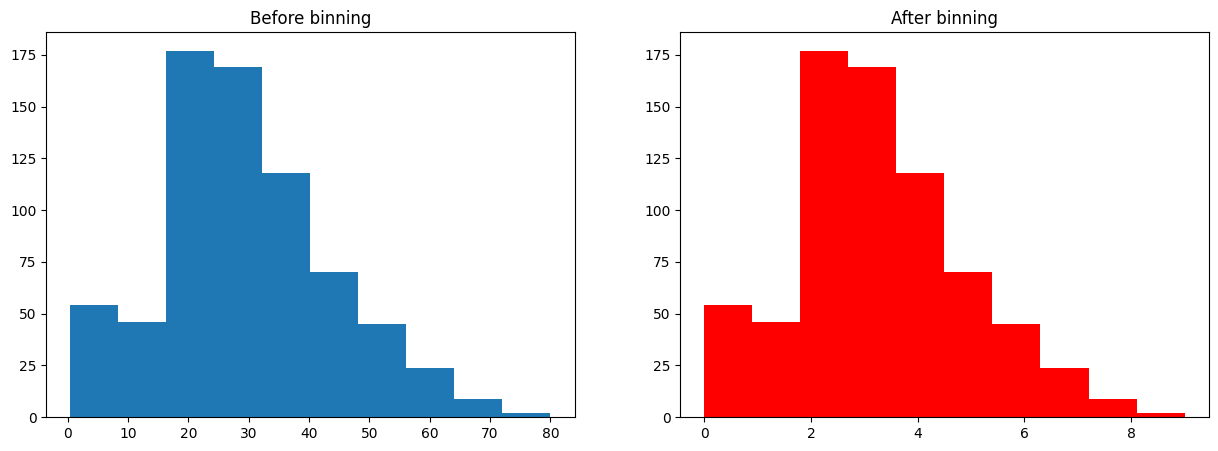

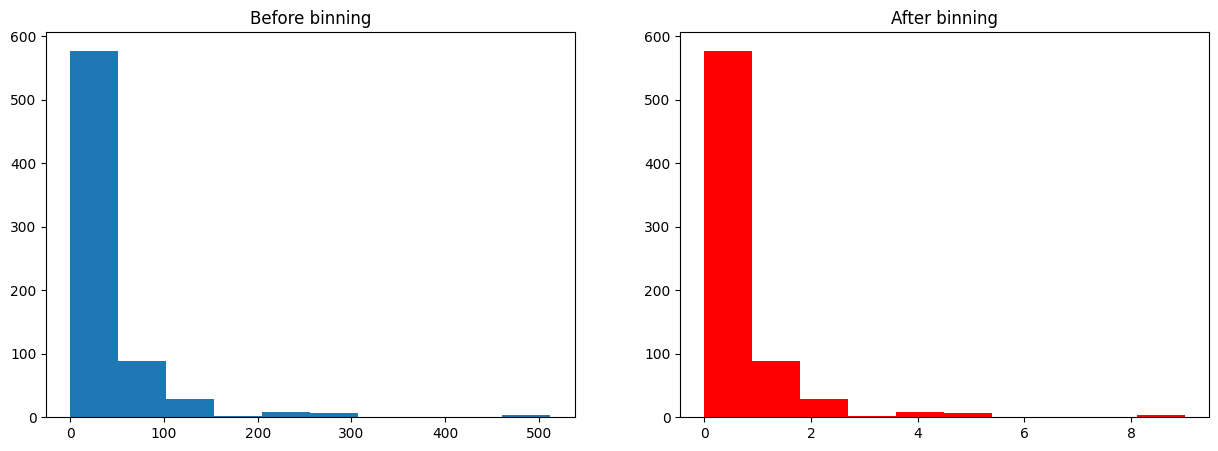

In [ ]:
discretize(10,"uniform")

Cross validation score mean :  0.6330594679186229


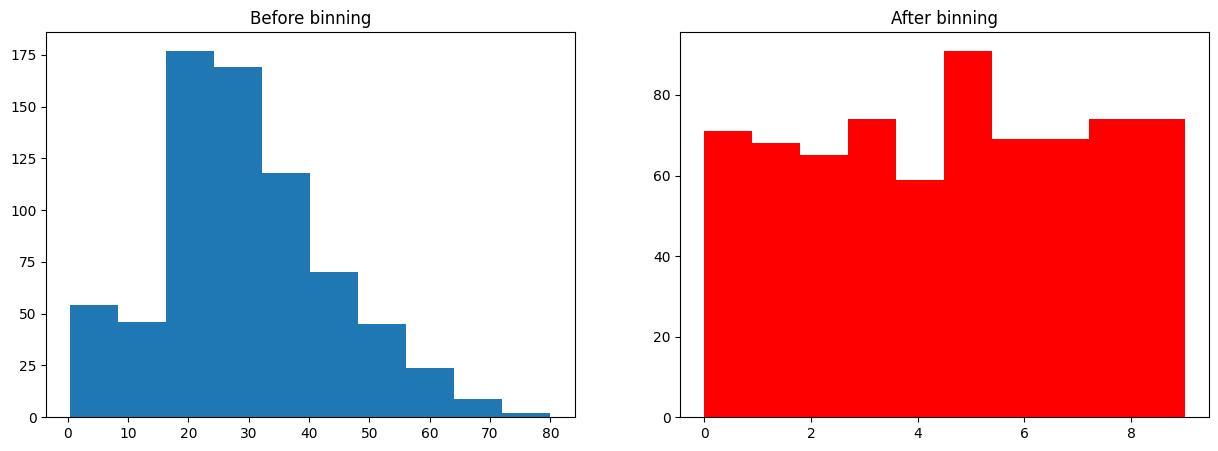

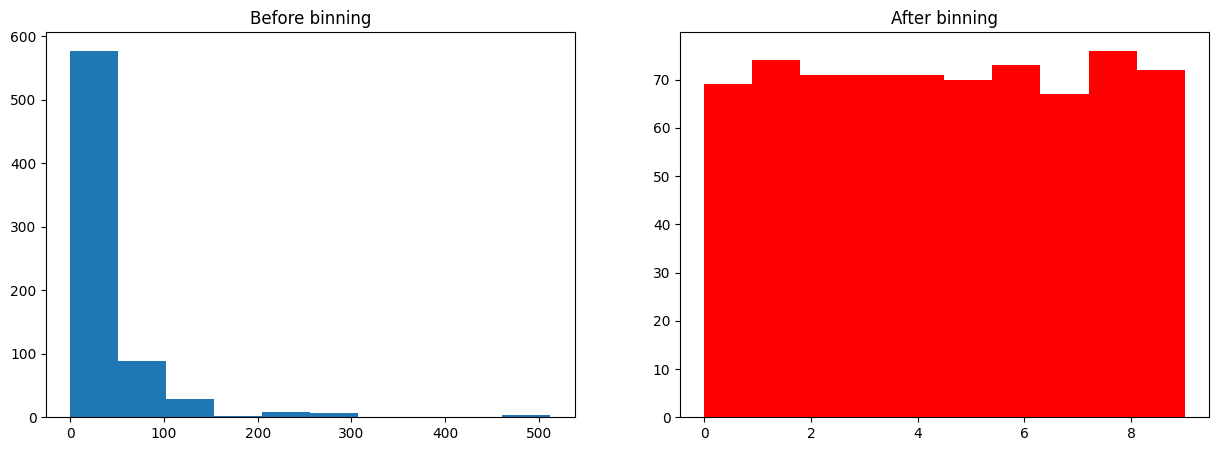

In [ ]:
discretize(10,"quantile")

Cross validation score mean :  0.6344874804381846


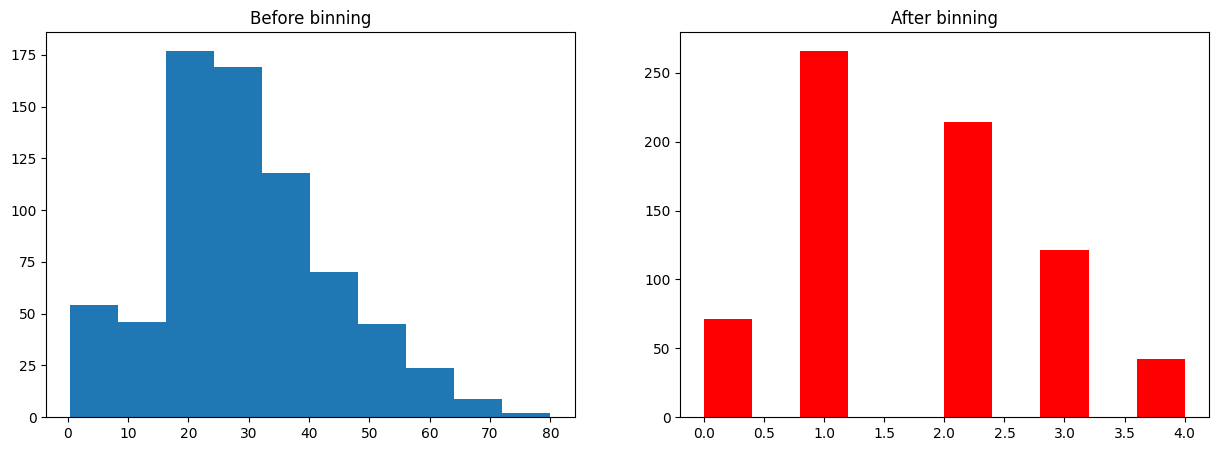

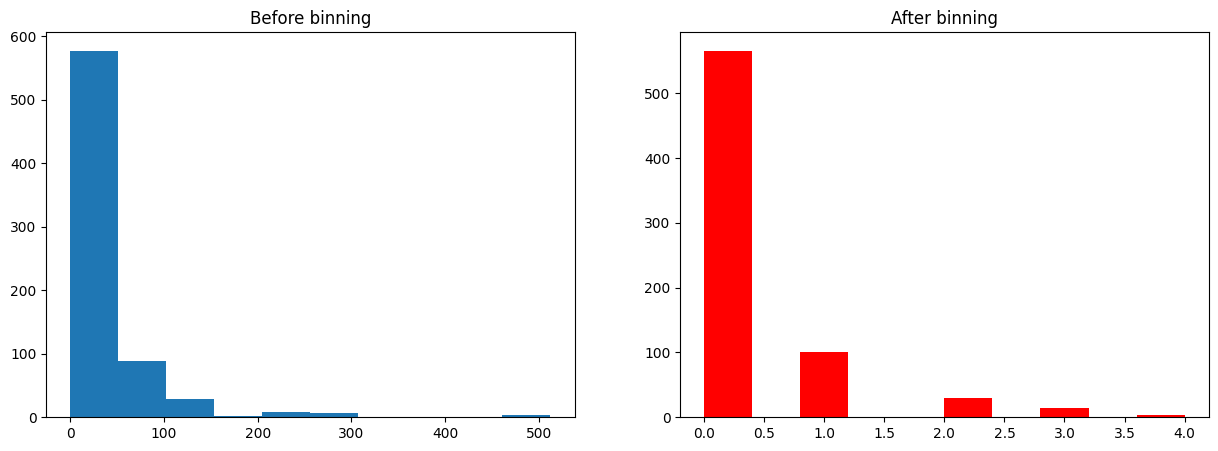

Cross validation score mean :  0.6344679186228481


In [ ]:
discretize(5,"kmeans")